# In-Class Assignment: Comprehensive Airbnb Pricing and Revenue Analysis

## Dataset:
Use the Airbnb dataset provided via listings.csv. It includes information such as `listing_id`, `host_id`, `neighbourhood`, `room_type`, `price`, `minimum_nights`, `number_of_reviews`, `last_review`, `reviews_per_month`, `availability_365`, etc.

### Task 1: Neighborhood and Host Analysis
Perform the following analyses on the Airbnb dataset:

* Create a clean price function which uses `str.replace(...)` to turn the price quotes into proper prices

In [17]:
#!pip install pandas matplotlib seaborn lets_plot geopandas
import pandas as pd
import seaborn as sns
from lets_plot import *
LetsPlot.setup_html()
df = pd.read_csv("listings.csv")

In [18]:
df['price'].head(50)

0      $85.00
1     $150.00
2     $975.00
3     $100.00
4     $450.00
5     $120.00
6      $80.00
7      $60.00
8      $90.00
9     $150.00
10     $95.00
11     $99.00
12    $245.00
13    $165.00
14    $461.00
15    $109.00
16     $66.00
17     $99.00
18    $200.00
19    $700.00
20    $110.00
21     $99.00
22    $450.00
23     $75.00
24    $600.00
25    $450.00
26    $150.00
27     $45.00
28    $300.00
29     $80.00
30    $175.00
31    $325.00
32    $175.00
33    $222.00
34    $159.00
35    $125.00
36    $348.00
37     $45.00
38    $150.00
39     $80.00
40    $110.00
41    $148.00
42    $350.00
43    $150.00
44    $150.00
45    $100.00
46    $349.00
47    $110.00
48    $160.00
49    $130.00
Name: price, dtype: object

In [19]:
def cleanPrice(pricestring):
    pricestring = pricestring.replace("$","")
    pricestring = pricestring.replace(",","")

    return(float(pricestring))


In [20]:
df['price'] = df['price'].apply(cleanPrice)

In [21]:
df['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [22]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

* Calculate the average price and number of reviews for each room_type in each neighbourhood.

In [24]:
df.groupby(['room_type','neighbourhood'])[['price','number_of_reviews']].mean()

price  number_of_reviews
room_type       neighbourhood                                     
Entire home/apt Alki                 195.789474          13.947368
                Arbor Heights        150.000000          20.000000
                Atlantic             139.058824          19.911765
                Ballard              153.876812          34.144928
                Belltown             172.187500          19.921875
...                                         ...                ...
Shared room     Queen Anne            39.000000           2.000000
                Roosevelt             56.000000           7.000000
                Stevens               34.785714          14.071429
                University District   53.888889          16.777778
                Wallingford           40.833333           4.166667

[178 rows x 2 columns]

* Identify the neighborhoods with the highest and lowest average prices.

In [26]:
df.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price')

,price
neighbourhood,
Roxhill,60.000000
Olympic Hills,63.666667
Dunlap,75.461538
Rainier Beach,76.722222
Georgetown,77.000000
...,...
Alki,196.652174
Westlake,197.000000
Portage Bay,241.428571


* Calculate the average availability (availability_365) for each neighbourhood.

In [27]:
df.groupby(['neighbourhood'])[['availability_365']].mean().sort_values(by='availability_365')

,availability_365
neighbourhood,
North College Park,88.000000
South Lake Union,161.761905
South Beacon Hill,165.000000
Broadway,175.200000
North Beach/Blue Ridge,176.272727
...,...
Yesler Terrace,317.916667
High Point,329.909091
Holly Park,354.833333


* Identify the neighborhood with the most listings.

In [28]:
df.groupby(['neighbourhood']).size().sort_values()

neighbourhood
Fairmount Park          1
North College Park      1
Roxhill                 1
Pike Market             2
South Beacon Hill       2
                     ... 
Queen Anne            187
Minor                 192
Belltown              204
Ballard               213
Capitol Hill          351
Length: 81, dtype: int64

* Create a geographic plot of the listings in the neighborhood with the most listings, using latitude and longitude to visualize the locations.

In [37]:
from lets_plot import tilesets

plot = ggplot() + \
       geom_livemap(tiles=tilesets.OSM) + \
       geom_point(aes(x='longitude', y='latitude', color='room_type', size='price'), data=df[df['neighbourhood']=="Capitol Hill"]) + ggtitle("Listings in Capitol Hill")
plot


* Calculate the average host_response_rate and host_acceptance_rate for each neighbourhood.

In [53]:
df['host_acceptance_rate']

0       100%
1       100%
2       100%
3        NaN
4        NaN
        ... 
3813    100%
3814    100%
3815     NaN
3816     NaN
3817     NaN
Name: host_acceptance_rate, Length: 3818, dtype: object

In [49]:
def cleanResponseRate(responseString):
    responseString = str(responseString)
    responseString = responseString.replace("%","")
    responseString = float(responseString) / 100
    return(responseString)

In [50]:
df['host_response_rate'] = df['host_response_rate'].apply(cleanResponseRate)

In [54]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(cleanResponseRate)

In [55]:
df.groupby(['neighbourhood'])[['host_response_rate','host_acceptance_rate']].mean()

,host_response_rate,host_acceptance_rate
neighbourhood,,
Alki,0.988421,1.0
Arbor Heights,1.000000,1.0
Atlantic,0.945581,1.0
Ballard,0.953613,1.0
Belltown,0.938783,1.0
...,...,...
Wallingford,0.951190,1.0
Wedgewood,0.990000,1.0
Westlake,0.681250,1.0


* Create a scatter plot to analyze the relationship between host_response_time and availability_365, using different colors to represent different room_type.

<Axes: xlabel='host_response_time', ylabel='availability_365'>

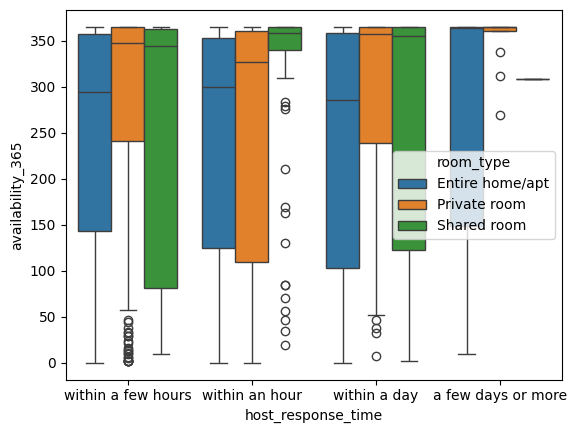

In [58]:
sns.boxplot(x='host_response_time', y='availability_365', hue="room_type", data=df)

### Task 2: Reviews and Room Types
Create the following plots to visualize the relationship between reviews, sub-review scores, and other factors:
* A scatter plot to analyze the relationship between number_of_reviews and price. Use different colors to represent different room_type.



<Axes: xlabel='number_of_reviews', ylabel='price'>

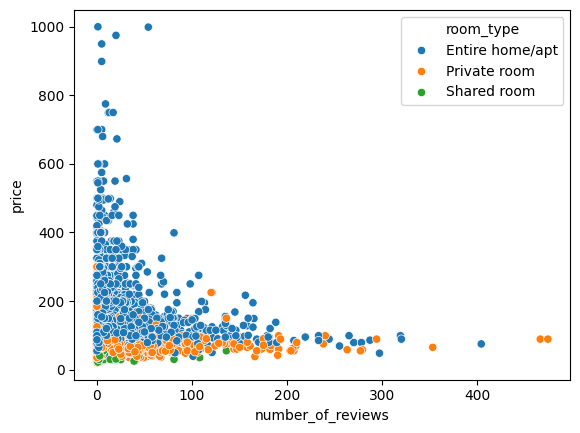

In [60]:
sns.scatterplot(x='number_of_reviews',y='price',hue='room_type',data=df)

* A plot to compare the number of reviews across different neighbourhoods.


<Axes: xlabel='neighbourhood_group_cleansed', ylabel='number_of_reviews'>

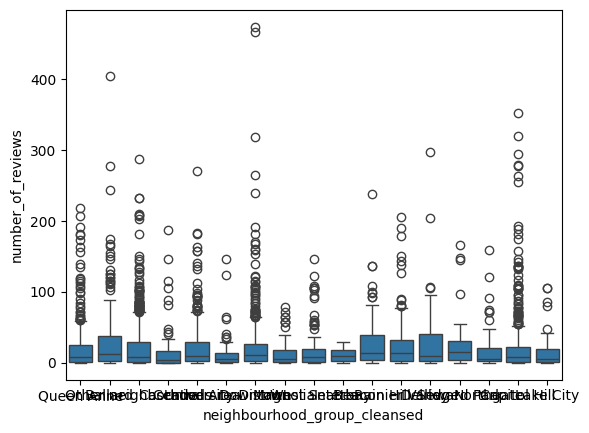

In [63]:
sns.boxplot(x="neighbourhood_group_cleansed",y="number_of_reviews",data=df)

In [64]:
ggplot(df) + geom_boxplot(aes(x="neighbourhood_group_cleansed",y="number_of_reviews"))

* Create a heatmap to show the correlation between different sub-review scores ('review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value').


<Axes: >

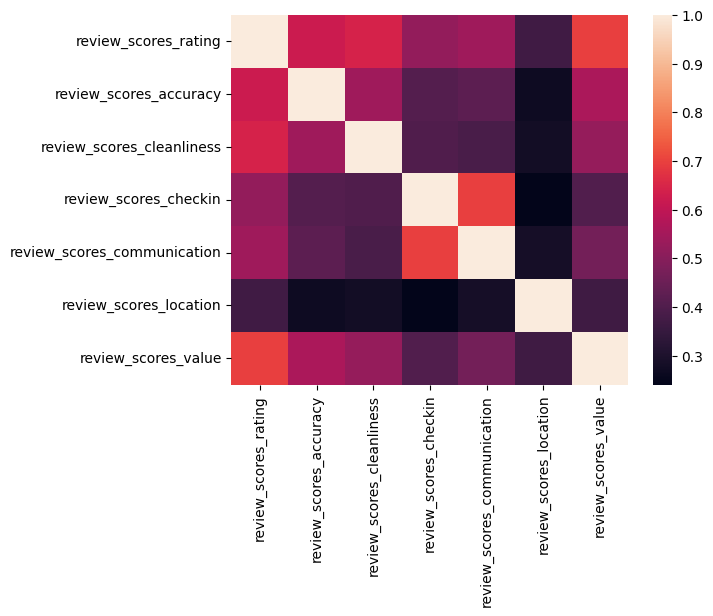

In [66]:
sns.heatmap(df[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].corr())

* Create a faceted scatterplot to analyze the relationship between price and a overall score with different plots for each room_type


In [73]:
ggplot(df) + geom_point(aes(x='review_scores_rating',y='price')) + facet_wrap('room_type',ncol=3)

### Task 3: Total Price Calculation
* Implement the Total Price Function: Calculate the total price for a booking given the number_of_nights, number_of_guests, price, guests_included, extra_people (cost for guest beyond included), cleaning_fee, and the weekly and monthly price.
* Apply the function to listings for a selected scenario.



In [74]:
def totalPrice(number_of_nights, number_of_guests, price, guests_included, extra_people, cleaning_fee, weekly_price, monthly_price):
    baseRate = price
    if (number_of_nights >= 30):
        baseRate = monthly_price / 30
    elif (number_of_nights >= 7):
        baseRate = weekly_price / 7
    
    guestSurcharge = 0
    if (number_of_guests > guests_included):
        guestSurcharge = (number_of_guests - guests_included) * number_of_nights * extra_people
    
    totalPrice = baseRate * number_of_nights + guestSurcharge + cleaning_fee


    return(totalPrice)

In [78]:
totalPrice(10,10,120,1,10,0,700,2000)

1900.0

In [79]:
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
